In [22]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [46]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle as pk


In [157]:
from imblearn.over_sampling import SMOTE

ImportError: cannot import name '_check_X' from 'imblearn.utils._validation' (C:\Users\abhis\anaconda3\Lib\site-packages\imblearn\utils\_validation.py)

# Data Loading

In [48]:
df=pd.read_csv('telco_customer_churn.csv')

In [49]:
df.shape

(7043, 21)

In [52]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [51]:
pd.set_option('display.max_columns', None)

In [53]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [54]:
# dropping customer id column
df=df.drop(columns='customerID')

In [57]:
df.columns


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [60]:
print(df['gender'].unique())

['Female' 'Male']


In [64]:
numerical_features_list = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in df.columns:
    if col not in numerical_features_list:
        print(col, df[col].unique())
        print("-" *50)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet 

In [66]:
print(df.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [69]:
df[df['TotalCharges']==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [70]:
len(df[df['TotalCharges']==' '])

11

In [71]:
df['TotalCharges'] = df['TotalCharges'].replace({" ":"0.0"})

In [72]:
df['TotalCharges']=df['TotalCharges'].astype(float)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [75]:
# checking the disrtibution of target column

print(df['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


# Insights
1. customer id is removed
2. no missing values
3. missing values in TotalCharge column ereplaced by 0
4. class imbalanced in the target


# 3=EDA

In [76]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [77]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


## descriptive analysis

In [78]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


 ## Numerical feature analysis

### Understanding Distribution 

In [82]:
def plot_histogram(df, column_name):
    
    plt.figure(figsize = (5,3))
    sns.histplot(df[column_name], kde=True)
    plt.title(f'Distribution of {column_name}')
    # calculate mean and median values for columns
    col_mean=df[column_name].mean()
    col_median=df[column_name].median()
    
    # add vertical lines for mean and median
    plt.axvline(col_mean, color='red', linestyle='--',label='mean')
    plt.axvline(col_median, color='green', linestyle='-',label='median')
    plt.legend()
    plt.show()

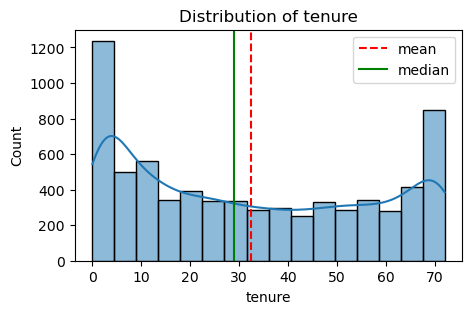

In [83]:
plot_histogram(df, 'tenure')

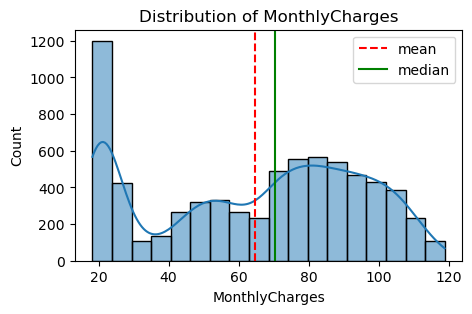

In [84]:
plot_histogram(df, 'MonthlyCharges')

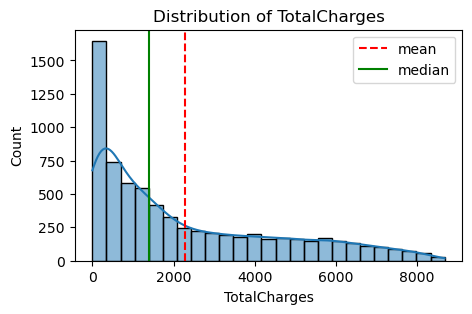

In [85]:
plot_histogram(df, 'TotalCharges')

### Box plot of numerical features
 

In [93]:
def plot_boxplot(df, column_name):
    plt.figure(figsize = (5,3))
    sns.boxplot(y=df[column_name])
    plt.title(f'Box Plot of {column_name}')
    plt.ylabel(column_name)
    plt.show()
    

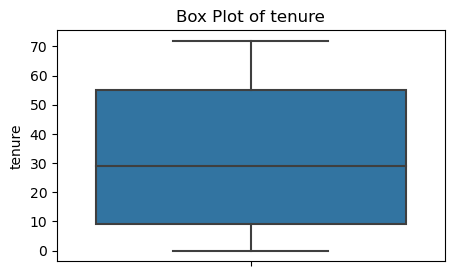

In [94]:
plot_boxplot(df, 'tenure')

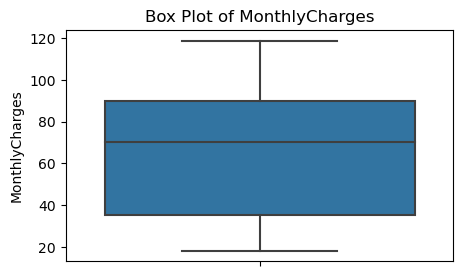

In [95]:
plot_boxplot(df, 'MonthlyCharges')

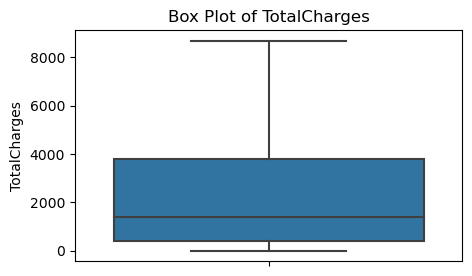

In [96]:
plot_boxplot(df, 'TotalCharges')

### Correlation heatmap for numerical features

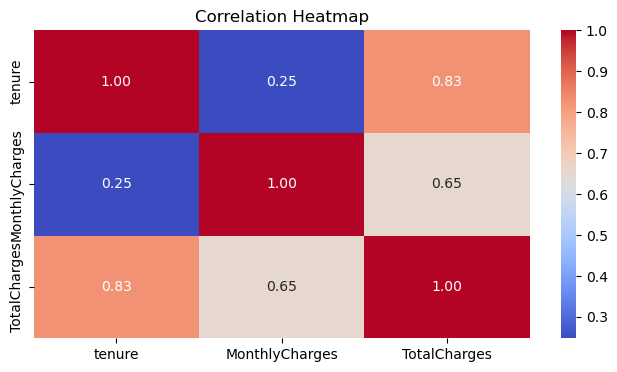

In [99]:
#correlation matrix

plt.figure(figsize=(8,4))
sns.heatmap(df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Categorical Analysis

In [100]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Countplot for categorical columns

In [104]:
object_cols=df.select_dtypes(include='object').columns.to_list()
object_cols = ['SeniorCitizen'] + object_cols

In [105]:
object_cols

['SeniorCitizen',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

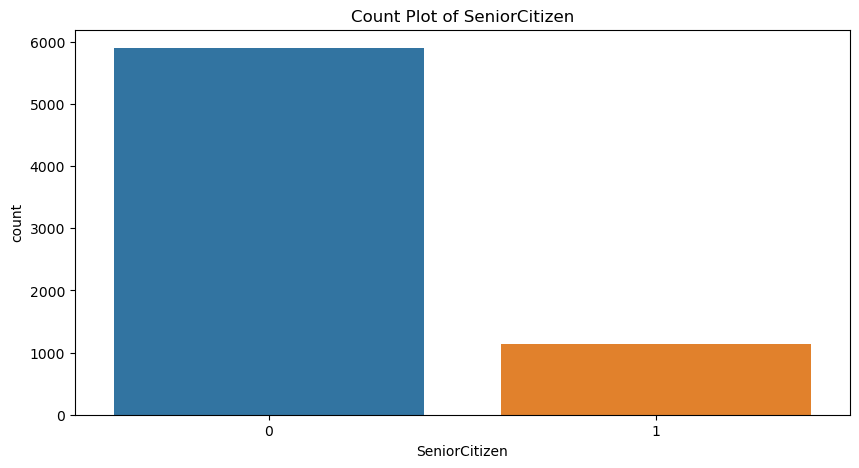

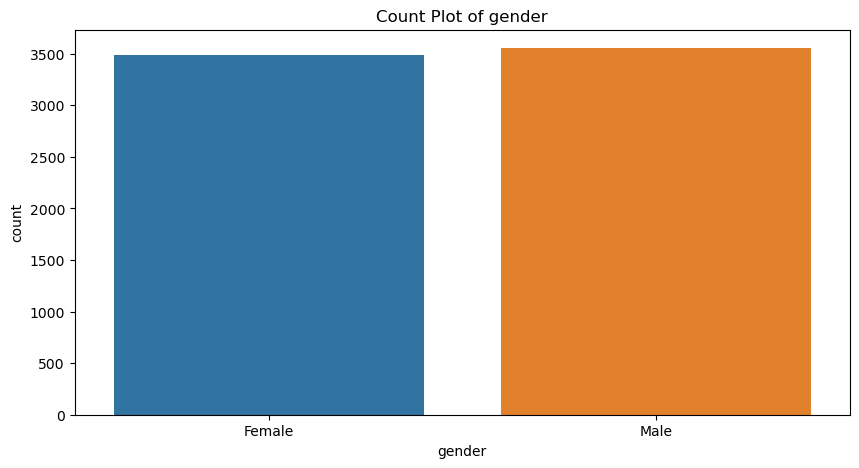

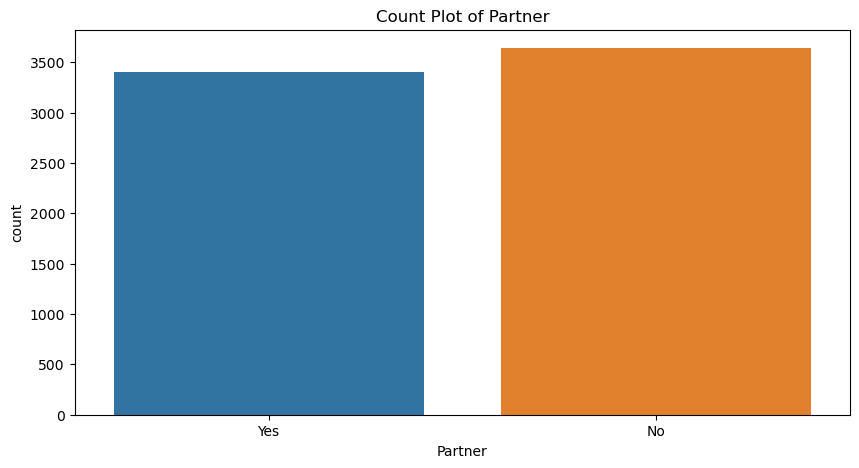

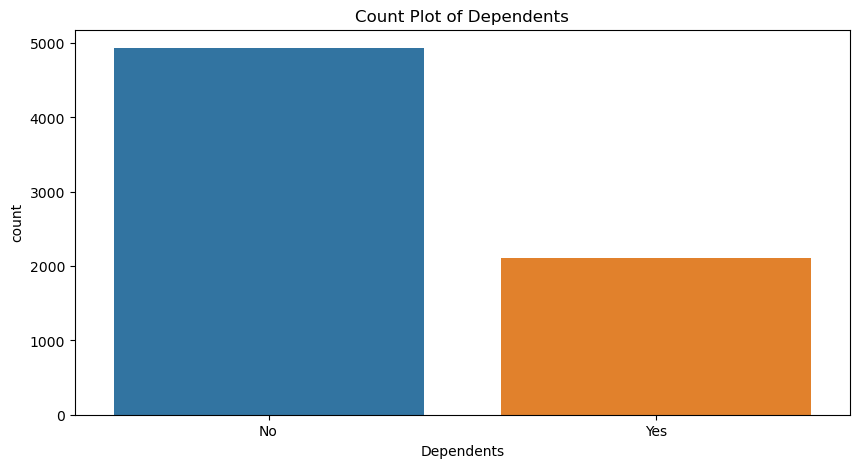

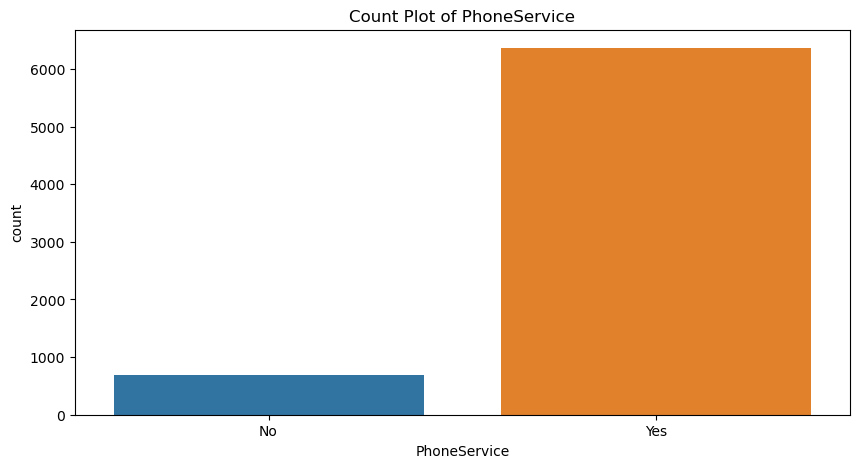

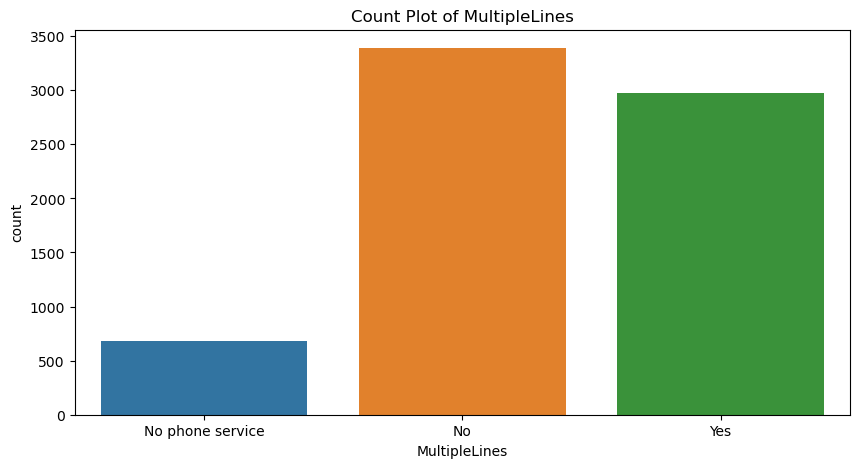

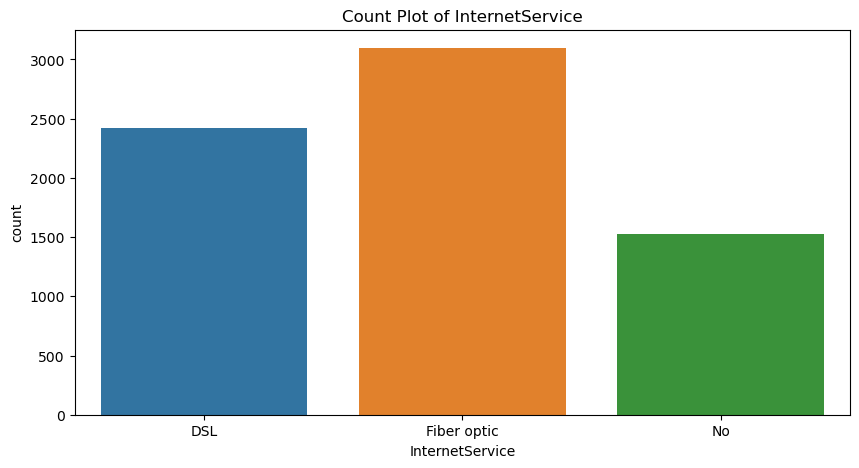

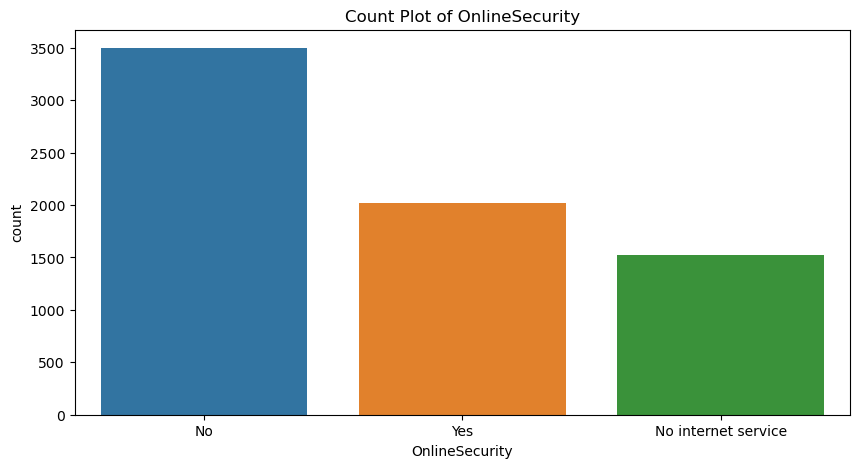

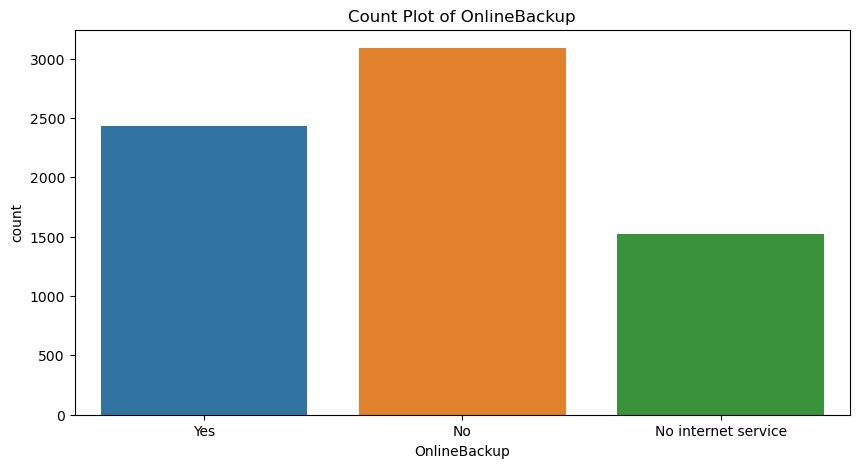

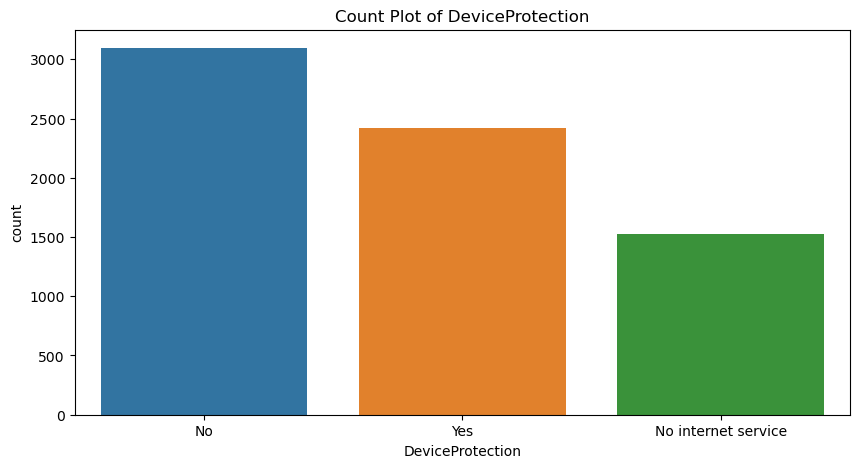

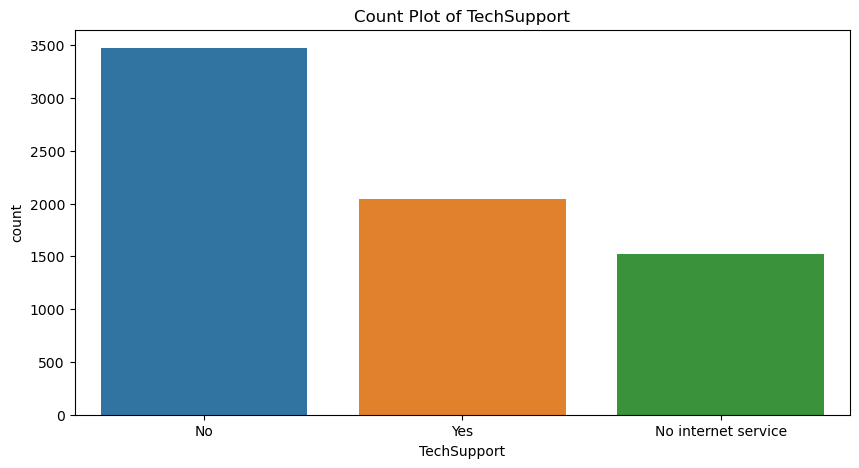

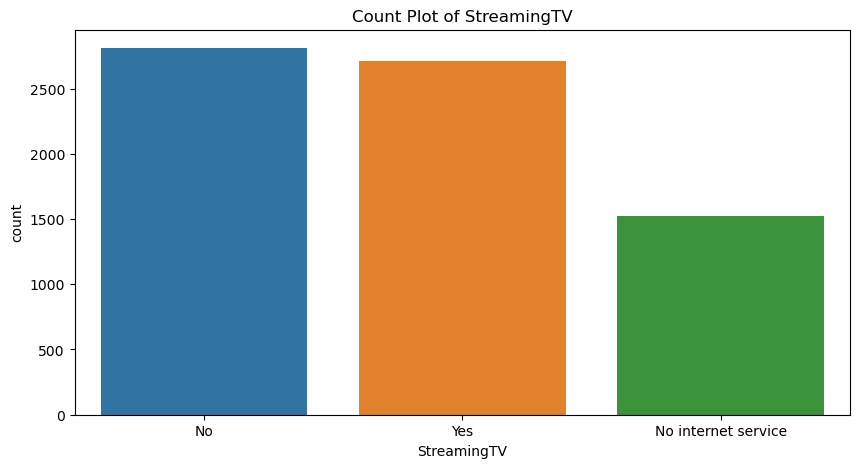

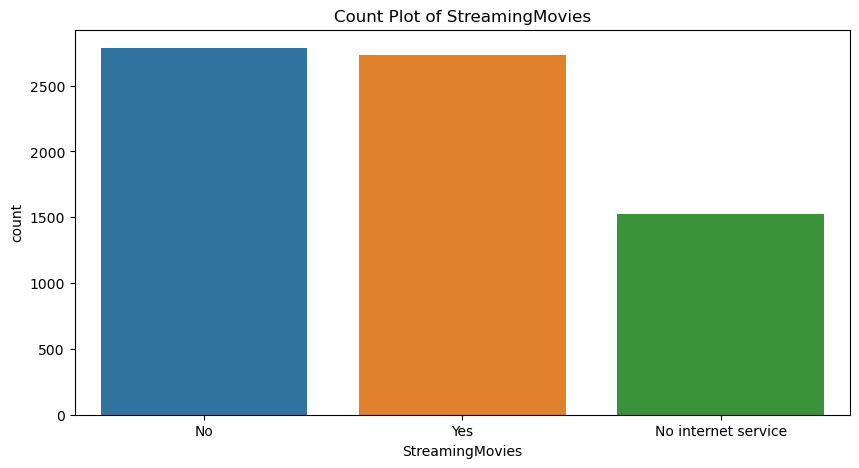

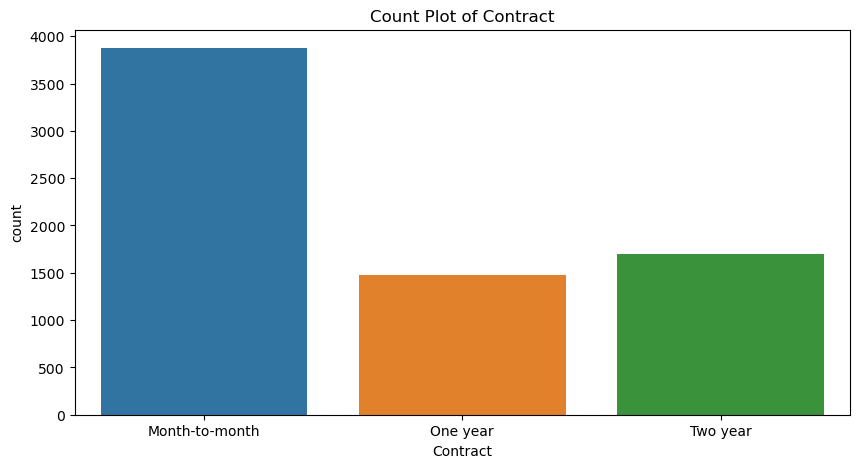

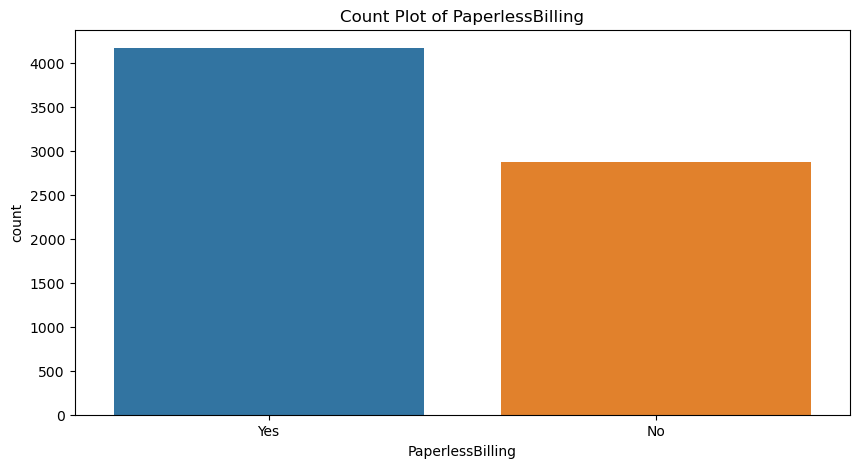

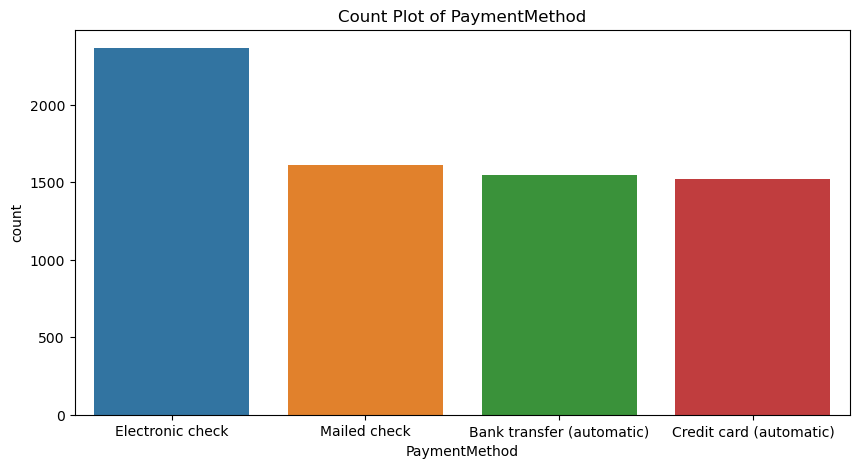

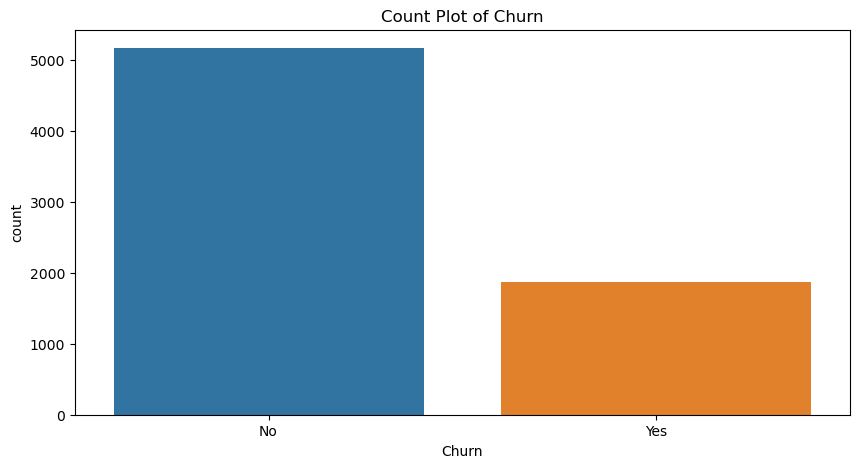

In [107]:
for col in object_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(x=df[col])
    plt.title(f'Count Plot of {col}')
    plt.show()

## Data Preprocessing

In [111]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


### label encoding of target column

In [110]:
df['Churn']=df['Churn'].replace({"Yes":1, "No":0})

In [112]:
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

### label encoding for categorical columns

#### Identifying columns with object dtype

In [113]:
object_columns=df.select_dtypes(include='object').columns

In [114]:
object_columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [138]:
# Initial a dictionary to save the encoders

encoders={}

# apply label encoding and store the encoders

for column in object_columns:
    label_encoder=LabelEncoder()
    df[column]=label_encoder.fit_transform(df[column])
    encoders[column]=label_encoder
    
    
# save the encoders to pickle file
with open("encoders.pkl", "wb") as f:
    pickle.dump(encoders,f)


In [139]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [140]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


### Training and test data split

In [142]:
x=df.drop(columns=['Churn'])
y=df['Churn']

In [143]:
print(x)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0     

In [158]:
# split trainingand test data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [159]:
print(y_train.shape)

(5634,)


In [147]:
print(y_train.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64


### Oversampling Technique (SMOTE) is not working, so chose alternative

In [170]:
from sklearn.utils import resample

X_min = x_train[y_train == 1]
y_min = y_train[y_train == 1]
X_maj = x_train[y_train == 0]
y_maj = y_train[y_train == 0]

X_min_upsampled, y_min_upsampled = resample(X_min, y_min,
                                            replace=True,
                                            n_samples=len(y_maj),
                                            random_state=42)

X_balanced = np.vstack((X_maj, X_min_upsampled))
y_balanced = np.hstack((y_maj, y_min_upsampled))

In [177]:
# If x_train is a DataFrame, you can reuse the original column names
x_train_smote = pd.DataFrame(X_balanced, columns=x_train.columns)

# Correct typo: pd.series → pd.Series
y_train_smote = pd.Series(y_balanced, name='target')


In [178]:
y_train_smote.value_counts()

target
0    4138
1    4138
Name: count, dtype: int64

# Model Training

## Training with default hypermaters

In [181]:
# dictionary of models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest":RandomForestClassifier(random_state=42),
    "XGBoost":XGBClassifier(random_state=42)
}

In [186]:
# dictionary to store the crossvalidation result

cv_scores ={}

# perform 5-fold validation for each model example

for model_name, model in models.items():
    print(model_name)
    print(model)
    print("-"*50)

Decision Tree
DecisionTreeClassifier(random_state=42)
--------------------------------------------------
Random Forest
RandomForestClassifier(random_state=42)
--------------------------------------------------
XGBoost
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)
---------------------

In [187]:
for model_name, model in models.items():
    print(f'Training {model_name} with default hypermaters')
    scores = cross_val_score(model, x_train_smote, y_train_smote, cv=5, scoring = "accuracy")
    cv_scores[model_name]=scores
    print(f'{model_name} cross_validation accuracy: {np.mean(scores):.2f}')

Training Decision Tree with default hypermaters
Decision Tree cross_validation accuracy: 0.87
Training Random Forest with default hypermaters
Random Forest cross_validation accuracy: 0.90
Training XGBoost with default hypermaters
XGBoost cross_validation accuracy: 0.86


In [188]:
cv_scores

{'Decision Tree': array([0.87379227, 0.87854985, 0.88640483, 0.8755287 , 0.85679758]),
 'Random Forest': array([0.89070048, 0.90755287, 0.90755287, 0.91299094, 0.89909366]),
 'XGBoost': array([0.8442029 , 0.87129909, 0.87311178, 0.87311178, 0.86163142])}

## Random Forest gave highest accuracy compared to other modelswith default parameters

In [189]:
rfc = RandomForestClassifier(random_state=42)

In [193]:
rfc.fit(x_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [194]:
y_test.value_counts()

Churn
0    1036
1     373
Name: count, dtype: int64

# Model Evaluation

In [195]:
# evalute on test data
y_test_pred=rfc.predict(x_test)

print("Accuracy score:\n", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Accuracy score:
 0.7863733144073811
Confusion Matrix:
 [[911 125]
 [176 197]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1036
           1       0.61      0.53      0.57       373

    accuracy                           0.79      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [198]:
# save the trained model as pickle file

model_data = {"model":rfc, "features": x.columns.to_list()}


with open("customer_churn_model.pkl", "wb") as f:
    pickle.dump(model_data, f)

 ## Load the saved model and build a predictive system

In [203]:
# load the saved modeland the features names
with open("customer_churn_model.pkl", "rb") as f:
    model_data=pickle.load(f)
    
    loade_model = model_data['model']
    features_names = model_data['features']

In [204]:
print(loade_model)

RandomForestClassifier(random_state=42)


In [205]:
print(features_names)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [ ]:
gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
    

In [228]:
input_data = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}


    
    

In [230]:
input_data_df=pd.DataFrame([input_data])

with open("encoders.pkl", "rb") as f:
    encoders = pickle.load(f)

    


In [232]:
for column, encoder in encoders.items():
    input_value = input_data_df[column].astype(str).values[0]
    if input_value in encoder.classes_:
        input_data_df[column] = encoder.transform([input_value])
    else:
        print(f"⚠️ '{input_value}' not seen in training for column '{column}'")
        input_data_df[column] = -1  # or some default code


⚠️ 'Female' not seen in training for column 'gender'
⚠️ 'Yes' not seen in training for column 'Partner'
⚠️ 'No' not seen in training for column 'Dependents'
⚠️ 'No' not seen in training for column 'PhoneService'
⚠️ 'No phone service' not seen in training for column 'MultipleLines'
⚠️ 'DSL' not seen in training for column 'InternetService'
⚠️ 'No' not seen in training for column 'OnlineSecurity'
⚠️ 'Yes' not seen in training for column 'OnlineBackup'
⚠️ 'No' not seen in training for column 'DeviceProtection'
⚠️ 'No' not seen in training for column 'TechSupport'
⚠️ 'No' not seen in training for column 'StreamingTV'
⚠️ 'No' not seen in training for column 'StreamingMovies'
⚠️ 'Month-to-month' not seen in training for column 'Contract'
⚠️ 'Yes' not seen in training for column 'PaperlessBilling'
⚠️ 'Electronic check' not seen in training for column 'PaymentMethod'


C:\Users\abhis\AppData\Local\Temp\ipykernel_424\3729235702.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if input_value in encoder.classes_:
C:\Users\abhis\AppData\Local\Temp\ipykernel_424\3729235702.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if input_value in encoder.classes_:
C:\Users\abhis\AppData\Local\Temp\ipykernel_424\3729235702.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if input_value in encoder.classes_:
C:\Users\abhis\AppData\Local\Temp\ipykernel_424\3729235702.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if input_value in encoder.classes_:
C:\Users\abhis\AppData\Local\Temp\ipykernel_424\3729235702.py:3: FutureWarning: elem

In [233]:
input_data_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1,0,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,29.85,29.85


In [242]:
prediction = loade_model.predict(input_data_df)
pred_prob = loade_model.predict_proba(input_data_df)
print(prediction)
print(f'Prediction: {"Churn" if prediction[0]==1 else "No Churn"}')
print(f'Prediction Probablity: {pred_prob}')

[0]
Prediction: No Churn
Prediction Probablity: [[0.61 0.39]]
